<a href="https://colab.research.google.com/github/Fernanda101704/Redes_Neurais_2021/blob/main/Projeto_2_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# Projeto 2: Disciplina de Redes Neurais - UFU
# Tema: Processamento de imagens ANN
# Professor: Ubirajara Coutinho Filho
# Aluna: Fernanda Silva Pimenta
# Data: 29/06/2021


In [58]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import cv2
import random
import zipfile

In [59]:
!git clone https://github.com/Fernanda101704/Redes_Neurais_2021
%cd Redes_Neurais_2021

Cloning into 'Redes_Neurais_2021'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 93 (delta 39), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (93/93), done.
/content/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021


In [60]:
# all images are load in variable x...
Arq =['Margaridas.zip','Orquídeas.zip','Rosas.zip']

img_name=[]
x_gray=[]
x_original = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()
  with zipfile.ZipFile(FILE, "r") as f:
      for name in f.namelist():
          img_name.append(name)

In [61]:
print(img_name)

['Margaridas/', 'Margaridas/Margarida (1).png', 'Margaridas/Margarida (10).png', 'Margaridas/Margarida (100).png', 'Margaridas/Margarida (101).png', 'Margaridas/Margarida (102).png', 'Margaridas/Margarida (103).png', 'Margaridas/Margarida (104).png', 'Margaridas/Margarida (105).png', 'Margaridas/Margarida (106).png', 'Margaridas/Margarida (107).png', 'Margaridas/Margarida (108).png', 'Margaridas/Margarida (11).png', 'Margaridas/Margarida (12).png', 'Margaridas/Margarida (13).png', 'Margaridas/Margarida (14).png', 'Margaridas/Margarida (15).png', 'Margaridas/Margarida (16).png', 'Margaridas/Margarida (17).png', 'Margaridas/Margarida (18).png', 'Margaridas/Margarida (19).png', 'Margaridas/Margarida (2).png', 'Margaridas/Margarida (20).png', 'Margaridas/Margarida (21).png', 'Margaridas/Margarida (22).png', 'Margaridas/Margarida (23).png', 'Margaridas/Margarida (24).png', 'Margaridas/Margarida (25).png', 'Margaridas/Margarida (26).png', 'Margaridas/Margarida (27).png', 'Margaridas/Margarid

In [62]:
y_names = []
for yy in img_name:
  name = yy[1]+yy[1]+yy[3]
  y_names.append(name)

In [63]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [64]:
print(unique_list)

['aag', 'rru', 'ooa']


In [65]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [66]:
DATASET_SIZE = len(y_names)
Ind = range(DATASET_SIZE)
Img_Size = 80
num_range = DATASET_SIZE

In [67]:
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)

In [68]:
X_train = []
Y_train = []
for II in Ind_train:
  name = img_name[II]
  # X_train.append(cv2.resize(cv2.imread(name),(50,50)))
  X_train.append(cv2.imread(name))
  Y_train.append(y[II])

In [69]:
X_test= []
Y_test = []
for II in Ind_test:
  name = img_name[II]
  X_test.append(cv2.imread(name))
  Y_test.append(y[II])

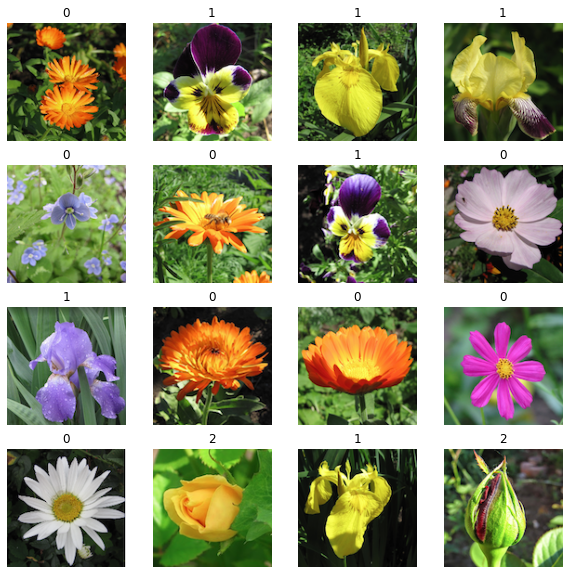

In [72]:
# view some images from the train_ds
# num,cols,dim = np.array(X_train[0]).shape
num = len(Y_train)
plt.figure(figsize=(10, 10))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_train[kk], cv2.COLOR_BGR2RGB)
  plt.imshow(RGB_img)
  plt.title(Y_train[kk])
  plt.axis("off")

In [73]:
num

174

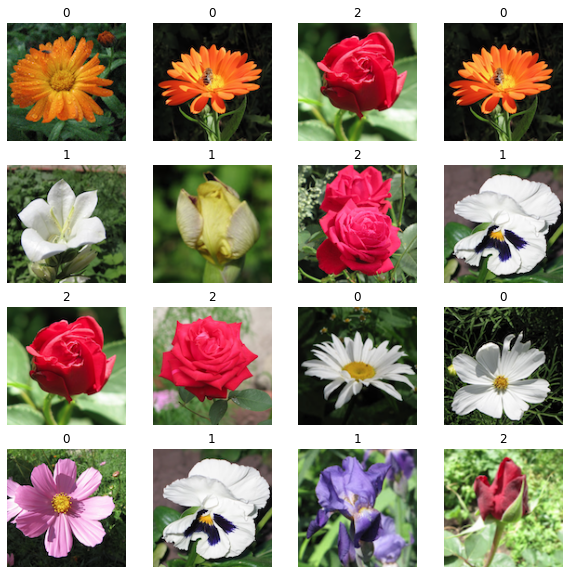

In [75]:
# view some images from the train_ds
# num,- = np.array(X_test).shape
num = len(Y_test)
plt.figure(figsize=(10, 10))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_test[kk], cv2.COLOR_BGR2RGB)
  plt.imshow(RGB_img)
  plt.title(Y_test[kk])
  plt.axis("off")